In [1]:
import numpy as np
from ML.knn import kNN_classify
from ML.metrics import accuracy_score
from ML.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
np.arange(1,2,0.2)

array([1. , 1.2, 1.4, 1.6, 1.8])

In [3]:
np.arange(2,3,0.2)

array([2. , 2.2, 2.4, 2.6, 2.8])

In [4]:
x,y=np.meshgrid(np.arange(1,2,0.2),np.arange(2,3,0.2))

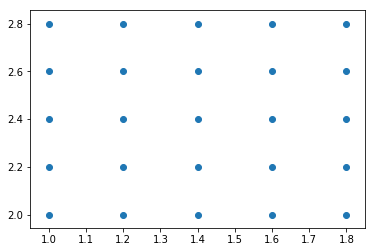

In [5]:
plt.scatter(x,y)

In [6]:
x.reshape(-1,1)

array([[1. ],
       [1.2],
       [1.4],
       [1.6],
       [1.8],
       [1. ],
       [1.2],
       [1.4],
       [1.6],
       [1.8],
       [1. ],
       [1.2],
       [1.4],
       [1.6],
       [1.8],
       [1. ],
       [1.2],
       [1.4],
       [1.6],
       [1.8],
       [1. ],
       [1.2],
       [1.4],
       [1.6],
       [1.8]])

In [7]:
X = np.concatenate([x.reshape(-1,1),y.reshape(-1,1)],axis=1)

In [17]:
X

array([[1. , 2. ],
       [1.2, 2. ],
       [1.4, 2. ],
       [1.6, 2. ],
       [1.8, 2. ],
       [1. , 2.2],
       [1.2, 2.2],
       [1.4, 2.2],
       [1.6, 2.2],
       [1.8, 2.2],
       [1. , 2.4],
       [1.2, 2.4],
       [1.4, 2.4],
       [1.6, 2.4],
       [1.8, 2.4],
       [1. , 2.6],
       [1.2, 2.6],
       [1.4, 2.6],
       [1.6, 2.6],
       [1.8, 2.6],
       [1. , 2.8],
       [1.2, 2.8],
       [1.4, 2.8],
       [1.6, 2.8],
       [1.8, 2.8]])

In [9]:
def height(x):
    return np.abs((x[0]-1)*(x[1]-2))

In [10]:
z=np.array([height(x) for x in X])

In [11]:
z

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.08, 0.12, 0.16, 0.  ,
       0.08, 0.16, 0.24, 0.32, 0.  , 0.12, 0.24, 0.36, 0.48, 0.  , 0.16,
       0.32, 0.48, 0.64])

In [12]:
z=z.reshape(x.shape)

In [13]:
z

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.04, 0.08, 0.12, 0.16],
       [0.  , 0.08, 0.16, 0.24, 0.32],
       [0.  , 0.12, 0.24, 0.36, 0.48],
       [0.  , 0.16, 0.32, 0.48, 0.64]])

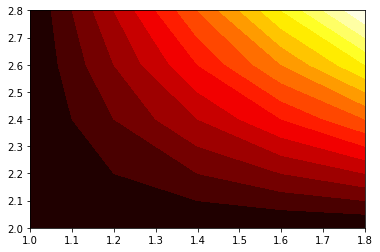

In [19]:
plt.contourf(x,y,z,20,cmap=plt.cm.hot)

In [26]:
X=np.loadtxt('x.txt')
X=X[:,2:]
y=np.loadtxt('y.txt')

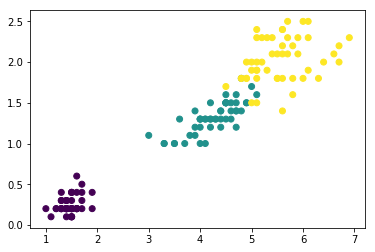

In [28]:
plt.scatter(X[:,0],X[:,1],c=y)

In [29]:
def plot_descision_boundary(X,y,predict_func,step=0.1):
    x_min = X[:,0].min()-0.5
    x_max = X[:,0].max()+0.5
    y_min = X[:,1].min()-0.5
    y_max = X[:,1].max()+0.5
    
    x_mesh,y_mesh=np.meshgrid(np.arange(x_min,x_max,step),np.arange(y_min,y_max,step))
    labels = predict_func(np.concatenate([x_mesh.reshape(-1,1),y_mesh.reshape(-1,1)],axis=1))
    
    z= labels.reshape(x_mesh.shape)
    plt.contourf(x_mesh,y_mesh,z,20,cmap=plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1],c=y)
    plt.show()

In [30]:
from ML.knn import KNeighborsClassifier

In [31]:
knn_clf = KNeighborsClassifier()

In [32]:
knn_clf.fit(X,y)

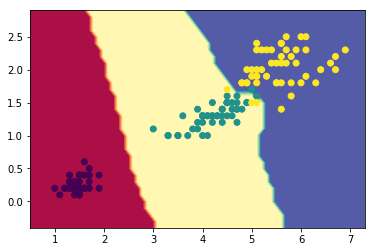

In [33]:
plot_descision_boundary(X,y,lambda x:knn_clf.predict(x))

In [34]:
from ML.tree import DecisionTreeClassfiy

In [35]:
dt_clf=DecisionTreeClassfiy()

In [37]:
dt_clf.fit(X,y)

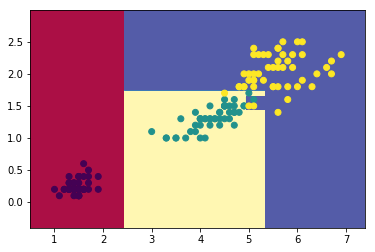

In [38]:
plot_descision_boundary(X,y,lambda x:dt_clf.predict(x),step=0.01)

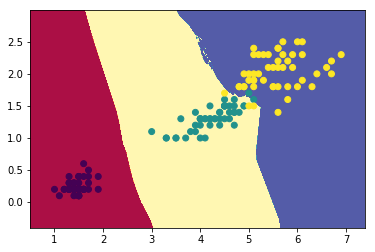

Wall time: 2min 39s


In [40]:
%%time
plot_descision_boundary(X,y,lambda x:knn_clf.predict(x),step=0.01)